In [1]:
import pickle
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import random
from PIL import Image
import  cv2
from imblearn.over_sampling import SMOTE
from keras.preprocessing.image import ImageDataGenerator

# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from torchvision import transforms
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/flowerDataset/train'
num_classes = 80

x_train = []
y_train = []

for label in range(num_classes):
    label_dir = os.path.join(data_dir, f'{label+1}')
    for filename in os.listdir(label_dir):
        image_path = os.path.join(label_dir, filename)
        image = cv2.imread(image_path)
        x_train.append(image)
        y_train.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
import pickle


with open('/content/drive/MyDrive/train_data.pickle', 'wb') as f:
    pickle.dump((x_train, y_train), f)

In [ ]:
with open('/content/drive/MyDrive/train_data.pickle', 'rb') as f:
    x_train, y_train = pickle.load(f)

In [ ]:
num_classes = 80
samples_per_class = 1
rows = 16
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(50, 50))

for label in range(num_classes):
    label_indices = np.where(y_train == label)[0]
    random_indices = np.random.choice(label_indices, samples_per_class, replace=False)

    for i, idx in enumerate(random_indices):
        img = x_train[idx]
        ax = axes[label // cols, label % cols]
        ax.imshow(img[:,:,::-1])
        ax.axis('off')
        ax.set_title(f'Class {label+1}')

plt.tight_layout()
plt.show()

In [28]:
data_dir = '/content/drive/MyDrive/flowerDataset/validation'
num_classes = 80

x_valid = []
y_valid = []

for label in range(num_classes):
    label_dir = os.path.join(data_dir, f'{label+1}')
    for filename in os.listdir(label_dir):
        image_path = os.path.join(label_dir, filename)
        image = cv2.imread(image_path)
        x_valid.append(image)
        y_valid.append(label)
        print(label)

x_valid = np.array(x_valid)
y_valid = np.array(y_valid)

In [ ]:
print(x_train.shape,x_valid.shape)

(14569, 224, 224, 3) (5440, 224, 224, 3)


In [ ]:
with open('/content/drive/MyDrive/valid_data.pickle', 'wb') as f:
    pickle.dump((x_valid, y_valid), f)

In [ ]:
with open('/content/drive/MyDrive/valid_data.pickle', 'rb') as f:
    x_valid, y_valid = pickle.load(f)

In [ ]:
print(x_valid.dtype,x_train.dtype,y_train.dtype,y_test.dtype)

uint8 uint8 int64 float64


In [4]:
dataset_path = '/content/drive/MyDrive/flowerDataset/test'


folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]


num_folders = len(folders)


x_test = np.zeros((num_folders, 2, 224, 224, 3), dtype=np.uint8)
y_test = np.zeros((num_folders,), dtype=np.int64)

for i, folder in enumerate(folders):
    image_names = os.listdir(os.path.join(dataset_path, folder))
    x_test[i, 0] = cv2.imread(os.path.join(dataset_path, folder, image_names[0]))
    x_test[i, 1] = cv2.imread(os.path.join(dataset_path, folder, image_names[1]))
    y_test[i] = int(folder.startswith('1'))
    print(i,y_test[i])

Streaming output truncated to the last 5000 lines.
6275 1
6276 1
6277 1
6278 1
6279 1
6280 1
6281 1
6282 1
6283 1
6284 1
6285 1
6286 1
6287 1
6288 1
6289 1
6290 1
6291 1
6292 1
6293 1
6294 1
6295 1
6296 1
6297 1
6298 1
6299 1
6300 1
6301 1
6302 1
6303 1
6304 1
6305 1
6306 1
6307 1
6308 1
6309 1
6310 1
6311 1
6312 1
6313 1
6314 1
6315 1
6316 1
6317 1
6318 1
6319 1
6320 1
6321 1
6322 1
6323 1
6324 1
6325 1
6326 1
6327 1
6328 1
6329 1
6330 1
6331 1
6332 1
6333 1
6334 1
6335 1
6336 1
6337 1
6338 1
6339 1
6340 1
6341 1
6342 1
6343 1
6344 1
6345 1
6346 1
6347 1
6348 1
6349 1
6350 1
6351 1
6352 1
6353 1
6354 1
6355 1
6356 1
6357 1
6358 1
6359 1
6360 1
6361 1
6362 1
6363 1
6364 1
6365 1
6366 1
6367 1
6368 1
6369 1
6370 1
6371 1
6372 1
6373 1
6374 1
6375 1
6376 1
6377 1
6378 1
6379 1
6380 1
6381 1
6382 1
6383 1
6384 1
6385 1
6386 1
6387 1
6388 1
6389 1
6390 1
6391 1
6392 1
6393 1
6394 1
6395 1
6396 1
6397 1
6398 1
6399 1
6400 1
6401 1
6402 1
6403 1
6404 1
6405 1
6406 1
6407 1
6408 1
6409 1
6410

In [5]:
print(x_test[0][0])

[[[  9  18  21]
  [ 10  19  22]
  [ 12  21  24]
  ...
  [ 17  18  22]
  [ 17  18  22]
  [ 15  16  20]]

 [[ 10  19  22]
  [ 10  19  22]
  [ 10  19  22]
  ...
  [ 17  18  22]
  [ 16  17  21]
  [ 15  16  20]]

 [[ 13  23  23]
  [ 12  22  22]
  [ 12  22  22]
  ...
  [ 17  18  22]
  [ 16  16  22]
  [ 15  15  21]]

 ...

 [[ 53  93  58]
  [ 55  97  62]
  [ 31  74  41]
  ...
  [ 11  11  11]
  [ 10  10  10]
  [ 10  10  10]]

 [[ 57  98  61]
  [ 51  93  58]
  [ 28  71  38]
  ...
  [ 11  11  11]
  [ 11  11  11]
  [ 10  10  10]]

 [[ 59 100  63]
  [ 47  89  54]
  [ 27  70  37]
  ...
  [ 11  11  11]
  [ 11  11  11]
  [ 11  11  11]]]


In [6]:
print(x_test.shape,y_test.shape)

(11275, 2, 224, 224, 3) (11275,)


In [9]:
with open('/content/drive/MyDrive/test_data.pickle', 'wb') as f:
    pickle.dump((x_test, y_test), f)

In [10]:
with open('/content/drive/MyDrive/test_data.pickle', 'rb') as f:
    x_test, y_test = pickle.load(f)

In [18]:
print(y_test[5002],len(y_test[y_test==1]))

1 5500


[11190  7527  8107  6203  6357  7328  9020  7426 10298  7766   308   265
   953  5982  4816  3056  1851  4400  4311  2961]


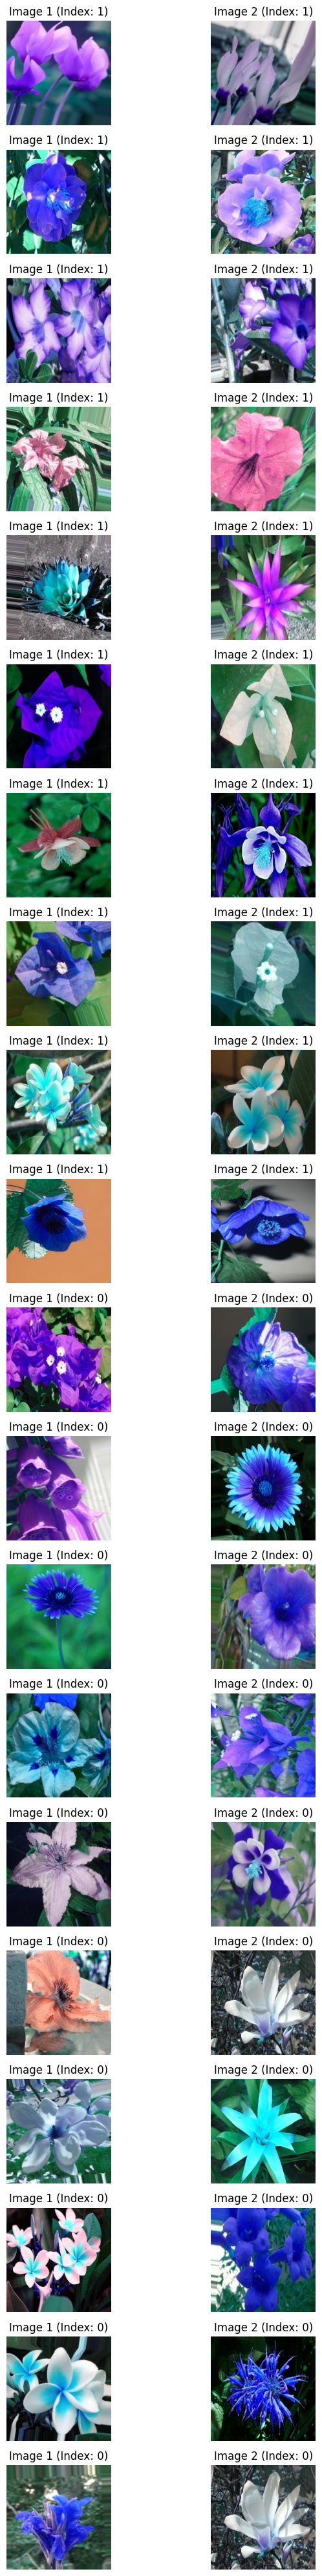

In [27]:

indices_1 =np.random.choice(np.where(y_test == 1)[0],size=10)


indices_0 =np.random.choice( np.where(y_test == 0)[0],size=10)

inc=np.concatenate([indices_1,indices_0])
print(inc)


# نمایش تصاویر متناظر با ایندکس‌های داده شده
def show_images(indices, images):
    fig, axes = plt.subplots(len(indices), 2, figsize=(8, 2*len(indices)))
    for i, index in enumerate(indices):
        axes[i, 0].imshow(images[index][0])
        axes[i, 0].axis('off')
        axes[i, 0].set_title(f'Image 1 (Index: {y_test[index]})')

        axes[i, 1].imshow(images[index][1])
        axes[i, 1].axis('off')
        axes[i, 1].set_title(f'Image 2 (Index: {y_test[index]})')

    plt.tight_layout()
    plt.show()


show_images(inc, x_test)



In [29]:
dataset_path = '/content/drive/MyDrive/flowerDataset/validation-LFW'


folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]


num_folders = len(folders)


x_validLFW = np.zeros((num_folders, 2, 224, 224, 3), dtype=np.uint8)
y_validLFW = np.zeros((num_folders,), dtype=np.int64)

for i, folder in enumerate(folders):
    image_names = os.listdir(os.path.join(dataset_path, folder))
    x_validLFW [i, 0] = cv2.imread(os.path.join(dataset_path, folder, image_names[0]))
    x_validLFW [i, 1] = cv2.imread(os.path.join(dataset_path, folder, image_names[1]))
    y_validLFW [i] = int(folder.startswith('1'))
    print(i,y_validLFW [i])

Streaming output truncated to the last 5000 lines.
5881 0
5882 0
5883 0
5884 0
5885 0
5886 0
5887 0
5888 0
5889 0
5890 0
5891 0
5892 0
5893 0
5894 0
5895 0
5896 0
5897 0
5898 0
5899 0
5900 0
5901 0
5902 0
5903 0
5904 0
5905 0
5906 0
5907 0
5908 0
5909 0
5910 0
5911 0
5912 0
5913 0
5914 0
5915 0
5916 0
5917 0
5918 0
5919 0
5920 0
5921 0
5922 0
5923 0
5924 0
5925 0
5926 0
5927 0
5928 0
5929 0
5930 0
5931 0
5932 0
5933 0
5934 0
5935 0
5936 0
5937 0
5938 0
5939 0
5940 0
5941 0
5942 0
5943 0
5944 0
5945 0
5946 0
5947 0
5948 0
5949 0
5950 0
5951 0
5952 0
5953 0
5954 0
5955 0
5956 0
5957 0
5958 0
5959 0
5960 0
5961 0
5962 0
5963 0
5964 0
5965 0
5966 0
5967 0
5968 0
5969 0
5970 0
5971 0
5972 0
5973 0
5974 0
5975 0
5976 0
5977 0
5978 0
5979 0
5980 0
5981 0
5982 0
5983 0
5984 0
5985 0
5986 0
5987 0
5988 0
5989 0
5990 0
5991 0
5992 0
5993 0
5994 0
5995 0
5996 0
5997 0
5998 0
5999 0
6000 1
6001 1
6002 1
6003 1
6004 1
6005 1
6006 1
6007 1
6008 1
6009 1
6010 1
6011 1
6012 1
6013 1
6014 1
6015 1
6016

In [31]:
with open('/content/drive/MyDrive/validLFW_data.pickle', 'wb') as f:
    pickle.dump((x_validLFW, y_validLFW), f)

In [32]:
with open('/content/drive/MyDrive/validLFW_data.pickle', 'rb') as f:
    x_validLFW, y_validLFW = pickle.load(f)

In [33]:
print( x_validLFW.shape,y_validLFW.shape)

(10881, 2, 224, 224, 3) (10881,)


[6854 7815 9207 6519 7912 7425 6191 7180 9902 8510 1632 5953  328 4967
 3342 4513 5693 4045 2095 2807]


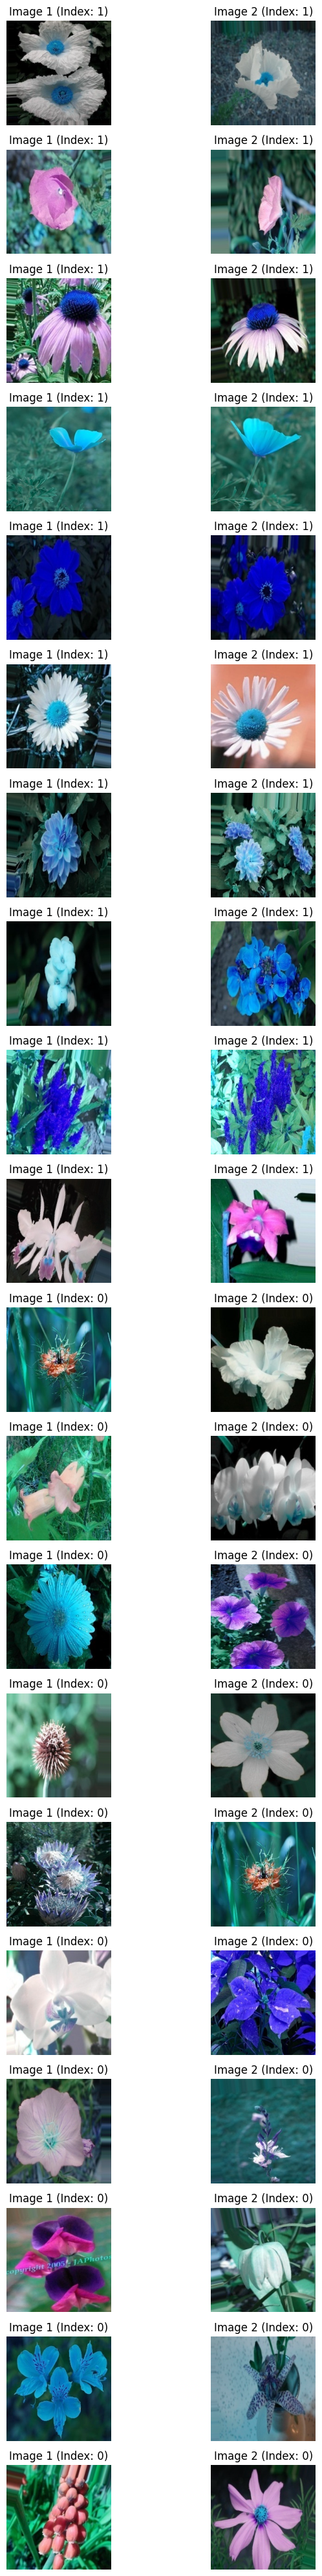

In [34]:

indices_1 =np.random.choice(np.where(y_validLFW == 1)[0],size=10)


indices_0 =np.random.choice( np.where(y_validLFW == 0)[0],size=10)

inc=np.concatenate([indices_1,indices_0])
print(inc)


# نمایش تصاویر متناظر با ایندکس‌های داده شده
def show_images(indices, images):
    fig, axes = plt.subplots(len(indices), 2, figsize=(8, 2*len(indices)))
    for i, index in enumerate(indices):
        axes[i, 0].imshow(images[index][0])
        axes[i, 0].axis('off')
        axes[i, 0].set_title(f'Image 1 (Index: {y_validLFW[index]})')

        axes[i, 1].imshow(images[index][1])
        axes[i, 1].axis('off')
        axes[i, 1].set_title(f'Image 2 (Index: {y_validLFW[index]})')

    plt.tight_layout()
    plt.show()


show_images(inc, x_validLFW)